## Pandas pivot table





In [28]:
import pandas as pd
import numpy as np

In [29]:
df1=pd.read_csv('coffee_sales.csv')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_date        4248 non-null   object
 1   market            4248 non-null   object
 2   region            4248 non-null   object
 3   product_category  4248 non-null   object
 4   product           4248 non-null   object
 5   cost              4248 non-null   int64 
 6   inventory         4248 non-null   int64 
 7   net_profit        4248 non-null   int64 
 8   sales             4248 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 298.8+ KB


In [31]:
df=pd.read_csv('coffee_sales.csv', parse_dates=['order_date'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        4248 non-null   datetime64[ns]
 1   market            4248 non-null   object        
 2   region            4248 non-null   object        
 3   product_category  4248 non-null   object        
 4   product           4248 non-null   object        
 5   cost              4248 non-null   int64         
 6   inventory         4248 non-null   int64         
 7   net_profit        4248 non-null   int64         
 8   sales             4248 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 298.8+ KB


## The Data

In [2]:
#def load_data():
    #return pd.read_csv('coffee_sales.csv', parse_dates=['order_date'])

In [33]:
#df = load_data()
df.head()

order_date     market   region product_category            product  cost  \
0 2010-01-01  Wholesale  Central           Coffee           Amaretto    89   
1 2010-01-01  Wholesale  Central           Coffee          Columbian    83   
2 2010-01-01  Wholesale  Central           Coffee  Decaf Irish Cream    95   
3 2010-01-01  Wholesale  Central              Tea          Green Tea    44   
4 2010-01-01  Wholesale  Central         Espresso        Caffe Mocha    54   

   inventory  net_profit  sales  
0        777          94    219  
1        623          68    190  
2        821         101    234  
3        623          30    100  
4        456          54    134

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        4248 non-null   datetime64[ns]
 1   market            4248 non-null   object        
 2   region            4248 non-null   object        
 3   product_category  4248 non-null   object        
 4   product           4248 non-null   object        
 5   cost              4248 non-null   int64         
 6   inventory         4248 non-null   int64         
 7   net_profit        4248 non-null   int64         
 8   sales             4248 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 298.8+ KB


## 1. Simplest Pivot table

The simplest pivot table must have an index. In our example, let’s use the region as our index. By default, it is performing the 'mean' aggregation function on all available numerical columns.

In [35]:
df.pivot_table(index='region')

cost   inventory  net_profit       sales
region                                                
Central  84.157738  742.648810   69.830357  197.206101
East     85.421171  778.191441   66.685811  201.099099
South    65.327381  478.273810   48.330357  154.651786
West     93.608631  872.632440   55.056548  202.577381

In [36]:
# With multiple indexes
df.pivot_table(index=['region', 'product_category'])

cost   inventory  net_profit       sales
region  product_category                                                
Central Coffee             74.390625  680.781250   60.583333  179.895833
        Espresso           89.666667  882.090278   81.600694  207.295139
        Herbal tea         87.065476  763.952381   73.681548  202.047619
        Tea                87.690476  672.529762   66.458333  203.500000
East    Coffee            110.976190  580.785714  184.476190  337.148810
        Espresso           95.600000  767.133333   26.016667  201.654167
        Herbal tea        101.240741  963.212963   29.736111  191.486111
        Tea                46.962121  762.484848   58.931818  121.882576
South   Coffee             78.916667  803.687500   60.947917  173.223958
        Espresso           62.305556  184.645833   52.100694  156.215278
        Herbal tea         56.270833  593.302083   30.057292  133.734375
West    Coffee             90.814103  931.583333   27.964744  185.410256
        Espresso           84.133333  828.933333   66.305556  194.188889
        Herbal tea         98.987179  802.282051   84.304487  231.692308
        Tea               100.844444  926.211111   41.938889  200.611111

In [37]:
# Multiple indexes with different order
df.pivot_table(index=['product_category', 'region'])

cost   inventory  net_profit       sales
product_category region                                                 
Coffee           Central   74.390625  680.781250   60.583333  179.895833
                 East     110.976190  580.785714  184.476190  337.148810
                 South     78.916667  803.687500   60.947917  173.223958
                 West      90.814103  931.583333   27.964744  185.410256
Espresso         Central   89.666667  882.090278   81.600694  207.295139
                 East      95.600000  767.133333   26.016667  201.654167
                 South     62.305556  184.645833   52.100694  156.215278
                 West      84.133333  828.933333   66.305556  194.188889
Herbal tea       Central   87.065476  763.952381   73.681548  202.047619
                 East     101.240741  963.212963   29.736111  191.486111
                 South     56.270833  593.302083   30.057292  133.734375
                 West      98.987179  802.282051   84.304487  231.692308
Tea              Central   87.690476  672.529762   66.458333  203.500000
                 East      46.962121  762.484848   58.931818  121.882576
                 West     100.844444  926.211111   41.938889  200.611111

## 2. Specifying `values` and performing aggregation
By default, pivot_table performs the mean aggregation function on all numerical columns and returns the result. To explicitly specify the columns we care about, use the values argument.

In [38]:
# Specifying values
df.pivot_table(index=['region'], values=['sales'])

sales
region             
Central  197.206101
East     201.099099
South    154.651786
West     202.577381

To perform an aggregation other than mean , we can pass a valid string function to aggfunc , for example, let’s do a sum:

In [39]:
df.pivot_table(index=['region'], values=['sales'], aggfunc='sum')

sales
region         
Central  265045
East     178576
South    103926
West     272264

In [40]:
# the dict equivalent
df.pivot_table(index=['region'], values=['sales'], aggfunc={ 'sales': 'sum' })

sales
region         
Central  265045
East     178576
South    103926
West     272264

In [41]:
df.pivot_table(index=['region'], values=['sales'], aggfunc=['sum', 'count'])

sum count
          sales sales
region               
Central  265045  1344
East     178576   888
South    103926   672
West     272264  1344

## 3. Seeing break down using `columns`

If we would like to see sales broken down by product_category, the columns argument allows us to do that

In [13]:
# See break down by product category
df.pivot_table(index=['region'], values=['sales'], aggfunc='sum', columns=['product_category'])

sales                             
product_category   Coffee Espresso Herbal tea      Tea
region                                                
Central           69080.0  59701.0    67888.0  68376.0
East              56641.0  48397.0    41361.0  32177.0
South             33259.0  44990.0    25677.0      NaN
West              57848.0  69908.0    72288.0  72220.0

## 4. Replacing missing values
You probably notice a NaN value from the previous output. We have got that because there aren't any Tea sales in the South. If we want to replace it, we could use fill_value argument, for example, to set NaN to 0.

In [42]:
# Remove NaN from above output
df.pivot_table(index=['region'], values=['sales'], aggfunc='sum', columns=['product_category'], fill_value=0)

sales                           
product_category Coffee Espresso Herbal tea    Tea
region                                            
Central           69080    59701      67888  68376
East              56641    48397      41361  32177
South             33259    44990      25677      0
West              57848    69908      72288  72220

## 5. Displaying multiple `values` and adjusting view

In [43]:
df.pivot_table(index=['region'], values=['sales', 'cost'], aggfunc='sum', columns=['product_category'], fill_value=0)

cost                             sales                      \
product_category Coffee Espresso Herbal tea    Tea Coffee Espresso Herbal tea   
region                                                                          
Central           28566    25824      29254  29464  69080    59701      67888   
East              18644    22944      21868  12398  56641    48397      41361   
South             15152    17944      10804      0  33259    44990      25677   
West              28334    30288      30884  36304  57848    69908      72288   

                         
product_category    Tea  
region                   
Central           68376  
East              32177  
South                 0  
West              72220

In [44]:
df.pivot_table(index=['region'], values=['sales', 'cost'], aggfunc='sum', columns=['product_category'], fill_value=np.mean(df['sales']))

cost                                    sales           \
product_category Coffee Espresso Herbal tea           Tea Coffee Espresso   
region                                                                      
Central           28566    25824      29254  29464.000000  69080    59701   
East              18644    22944      21868  12398.000000  56641    48397   
South             15152    17944      10804    192.987524  33259    44990   
West              28334    30288      30884  36304.000000  57848    69908   

                                           
product_category Herbal tea           Tea  
region                                     
Central               67888  68376.000000  
East                  41361  32177.000000  
South                 25677    192.987524  
West                  72288  72220.000000

In [45]:
# Move product_category to the index to get a better view
df.pivot_table(index=['region', 'product_category'], values=['sales', 'cost'], aggfunc='sum', fill_value=np.mean(df['sales']))

cost  sales
region  product_category              
Central Coffee            28566  69080
        Espresso          25824  59701
        Herbal tea        29254  67888
        Tea               29464  68376
East    Coffee            18644  56641
        Espresso          22944  48397
        Herbal tea        21868  41361
        Tea               12398  32177
South   Coffee            15152  33259
        Espresso          17944  44990
        Herbal tea        10804  25677
West    Coffee            28334  57848
        Espresso          30288  69908
        Herbal tea        30884  72288
        Tea               36304  72220

## 6. Showing total

In [46]:
df.pivot_table(index=['region', 'product_category'], values=['sales', 'cost'], aggfunc='sum', fill_value=0, margins=True)

cost   sales
region  product_category                
Central Coffee             28566   69080
        Espresso           25824   59701
        Herbal tea         29254   67888
        Tea                29464   68376
East    Coffee             18644   56641
        Espresso           22944   48397
        Herbal tea         21868   41361
        Tea                12398   32177
South   Coffee             15152   33259
        Espresso           17944   44990
        Herbal tea         10804   25677
West    Coffee             28334   57848
        Espresso           30288   69908
        Herbal tea         30884   72288
        Tea                36304   72220
All                       358672  819811

## 7. Generating a monthly report

Raw sales data is rarely aggregated by month for us. This type of data is often captured by the day. However, managers often want reports by month instead of detail by day. To generate a monthy sales report with Panda pivot_table(), here are the steps:

(1) defines a groupby instruction using Grouper() with key='order_date' and freq='M'

(2) defines a condition to filter the data by year, for example 2010

(3) Use Pandas method chaining to chain the filtering and pivot_table().

In [47]:
# Let's generate a monthly sales report
month_gp = pd.Grouper(key='order_date',freq='M')
cond = df["order_date"].dt.year == 2010

(
    df[cond]
    .pivot_table(index=['region','product_category'],
        columns=[month_gp],
        values=['sales'],
        aggfunc=['sum'])
)

sum                                   \
                              sales                                    
order_date               2010-01-31 2010-02-28 2010-03-31 2010-04-30   
region  product_category                                               
Central Coffee                 2663       2708       2703       2815   
        Espresso               2370       2432       2467       2446   
        Herbal tea             2664       2704       2691       2735   
        Tea                    2649       2659       2702       2774   
East    Coffee                 2105       2061       2126       2258   
        Espresso               1853       1966       1907       1935   
        Herbal tea             1609       1621       1638       1753   
        Tea                    1213       1272       1250       1267   
South   Coffee                 1207       1260       1265       1280   
        Espresso               1770       1803       1781       1790   
        Herbal tea              999       1019       1009        995   
West    Coffee                 2339       2298       2313       2332   
        Espresso               2723       2759       2796       2798   
        Herbal tea             2602       2702       2739       2884   
        Tea                    2789       2828       2858       2881   

                                                                      \
                                                                       
order_date               2010-05-31 2010-06-30 2010-07-31 2010-08-31   
region  product_category                                               
Central Coffee                 2878       3008       3148       3012   
        Espresso               2497       2497       2556       2554   
        Herbal tea             2795       2908       2976       2961   
        Tea                    2840       2863       2912       2909   
East    Coffee                 2347       2625       2735       2673   
        Espresso               1896       2071       1992       1984   
        Herbal tea             1779       1795       1926       1677   
        Tea                    1319       1404       1395       1469   
South   Coffee                 1369       1429       1489       1579   
        Espresso               1849       1896       1923       1923   
        Herbal tea              978       1016       1036       1139   
West    Coffee                 2351       2495       2541       2523   
        Espresso               2829       2897       2992       3077   
        Herbal tea             2965       3133       3380       3386   
        Tea                    3000       3088       3160       3163   

                                                                      
                                                                      
order_date               2010-09-30 2010-10-31 2010-11-30 2010-12-31  
region  product_category                                              
Central Coffee                 2734       2694       2632       2813  
        Espresso               2394       2391       2282       2320  
        Herbal tea             2747       2734       2631       2669  
        Tea                    2851       2762       2670       2860  
East    Coffee                 2362       2094       2066       2288  
        Espresso               1887       2124       2076       1981  
        Herbal tea             1539       1544       1605       1755  
        Tea                    1337       1339       1231       1249  
South   Coffee                 1389       1341       1294       1378  
        Espresso               1844       1820       1796       1813  
        Herbal tea             1033       1119       1115       1100  
West    Coffee                 2359       2234       2228       2293  
        Espresso               2816       2857       2788       2868  
        Herbal tea             2850       2879       2806       3065  
        Tea     

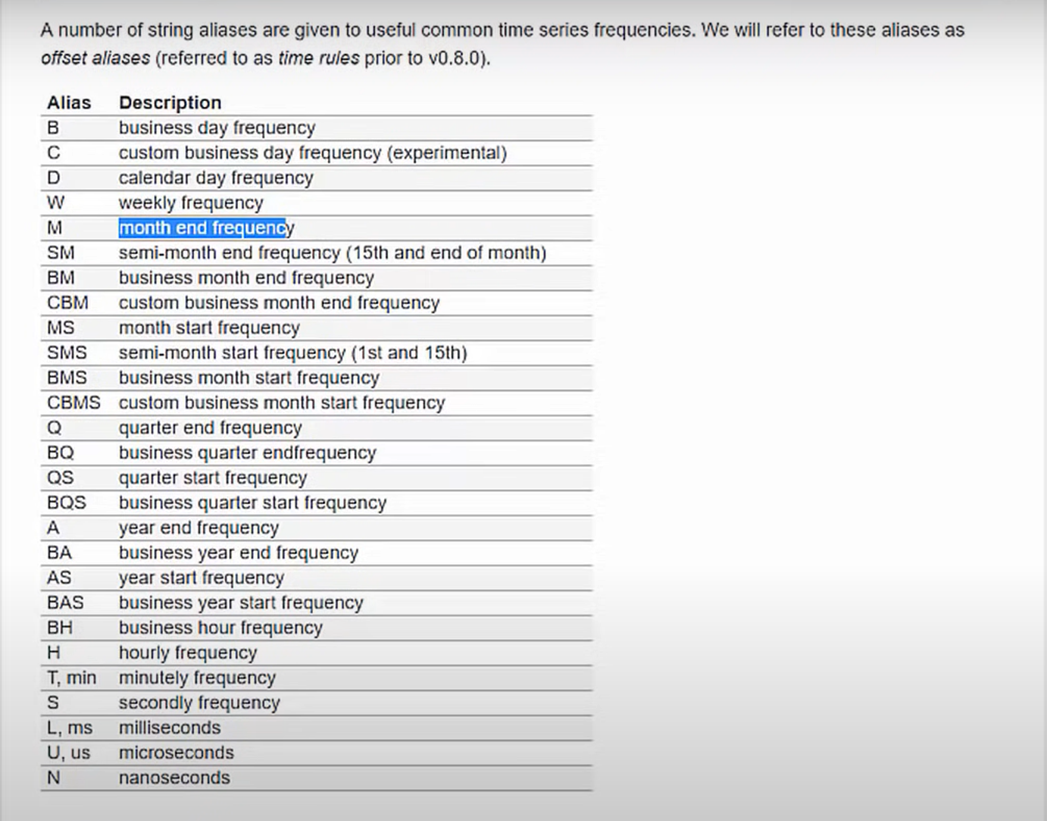